In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
import yfinance as yf
# mport streamlit as st
import pandas as pd
from pandas_datareader import data as pdr

In [2]:
start, end = datetime.date(2016, 7, 6), datetime.date(2021, 7, 6)
data = pdr.get_data_yahoo("AAPL", start=start, end=end)
data["date"] = data.index
data["year"] = data["date"].astype(str).str.split("-", expand=True)[0]
data

,High,Low,Open,Close,Volume,Adj Close,date,year
Date,,,,,,,,
2016-07-06,23.915001,23.592501,23.650000,23.882500,123796400.0,22.116472,2016-07-06,2016
2016-07-07,24.125000,23.905001,23.924999,23.985001,100558400.0,22.211390,2016-07-07,2016
2016-07-08,24.222500,24.012501,24.122499,24.170000,115648400.0,22.382713,2016-07-08,2016
2016-07-11,24.412500,24.182501,24.187500,24.245001,95179600.0,22.452164,2016-07-11,2016
2016-07-12,24.424999,24.280001,24.292500,24.355000,96670000.0,22.554033,2016-07-12,2016
...,...,...,...,...,...,...,...,...
2021-06-29,136.490005,134.350006,134.800003,136.330002,64556100.0,135.143341,2021-06-29,2021
2021-06-30,137.410004,135.869995,136.169998,136.960007,63261400.0,135.767853,2021-06-30,2021
2021-07-01,137.330002,135.759995,136.600006,137.270004,52485800.0,136.075150,2021-07-01,2021


In [3]:
data["Adj Close"].values

array([ 22.11646843,  22.21139526,  22.38271141, ..., 136.07513428,
       138.74172974, 140.78379822])

matplotlib.figure.Figure

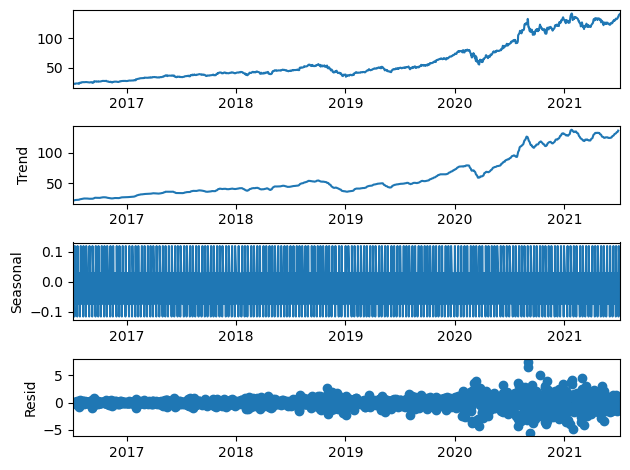

In [53]:
import matplotlib.pyplot as plt
seasonal_decomposition = seasonal_decompose(data[["Adj Close"]], model = 'additive', period=7)
seasonal_decomposition_fig = seasonal_decomposition.plot()
type(seasonal_decomposition_fig)

In [51]:
#import chart_studio.plotly as py
import plotly.tools as tls
from plotly.offline import iplot

fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly(seasonal_decomposition_fig)
iplot(plotly_fig)

<Figure size 640x480 with 0 Axes>

In [20]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [29]:
import plotly.tools as tls
from plotly.offline import iplot
import plotly.express as px

plt.figure(figsize=(15,5))
plotly_fig = tls.mpl_to_plotly(seasonal_decomposition_fig)
plotly_fig = iplot(plotly_fig)

<Figure size 1500x500 with 0 Axes>

In [15]:
import plotly

seasonal_decomposition = seasonal_decompose(data[["Adj Close"]], model = 'additive', period=30)
seasonal_decomposition_fig = seasonal_decomposition.plot()
seasonal_decomposition_fig = plotly.tools.mpl_to_plotly(seasonal_decomposition_fig)
seasonal_decomposition_fig.update_layout(width = 850, height = 500, title = 'Seasonal Decomposition')

<AxesSubplot: xlabel='Date'>

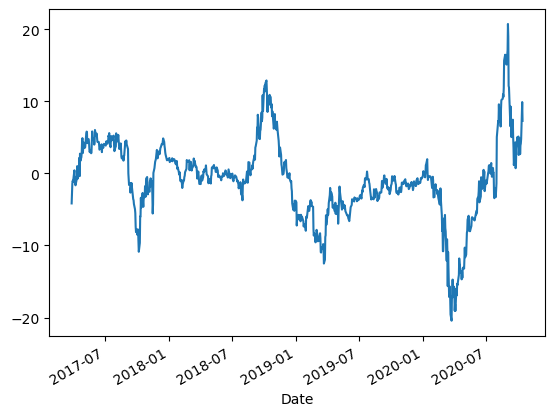

In [52]:
seasonal_decomposition.resid.plot()

<AxesSubplot: xlabel='Date'>

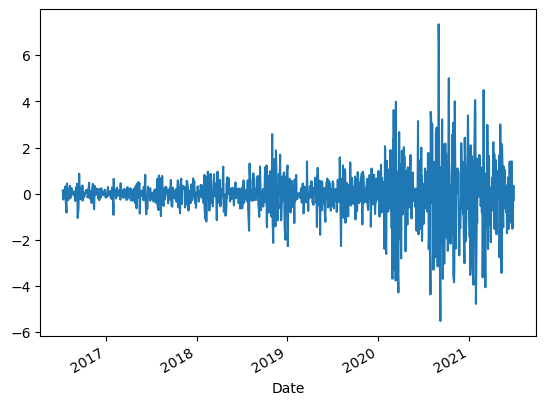

In [48]:
seasonal_decomposition.resid.plot()

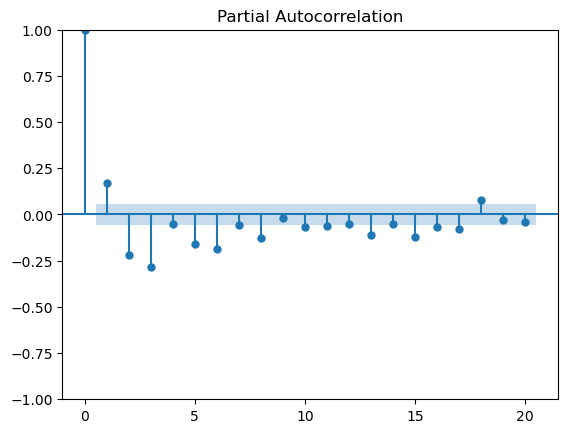

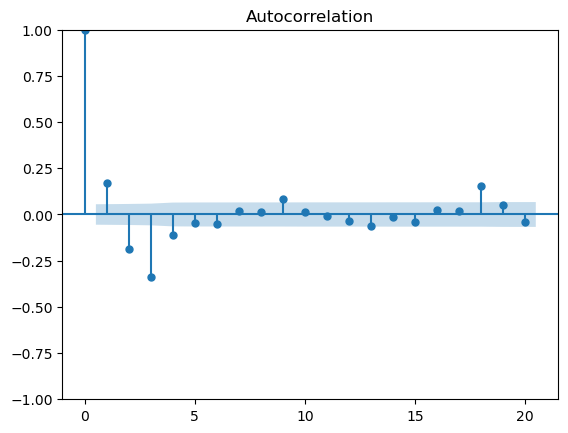

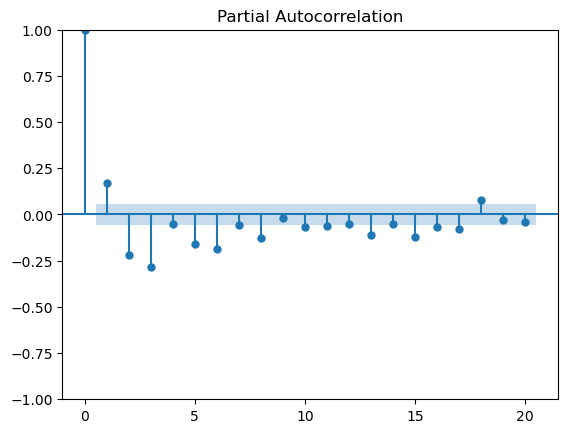

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(seasonal_decomposition.resid.dropna(), lags = 20)
plot_pacf(seasonal_decomposition.resid.dropna(), lags = 20, method="ols")

In [36]:
seasonal_decomposition.resid.dropna()

Date
2016-07-11    0.137712
2016-07-12   -0.104037
2016-07-13   -0.249777
2016-07-14    0.069725
2016-07-15    0.071885
                ...   
2021-06-24   -0.539298
2021-06-25   -1.516109
2021-06-28   -0.223516
2021-06-29    0.349994
2021-06-30   -0.270870
Name: resid, Length: 1253, dtype: float64

In [54]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
import statsmodels.api as sm

# y = data['Adj Close'].resample('MS').mean()
y = seasonal_decomposition.resid.dropna()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47413D+00    |proj g|=  7.32896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   4.748D-07   1.474D+00
  F =   1.4741328448224087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3696.176909124956
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   1.685D-07   1.824D+00
  F =   1.8235702918395638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4571.867151349947
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55231D+00    |proj g|=  2.33620D-01

At iterate    5    f=  1.47162D+00    |proj g|=  1.46489D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.46375D+00    |proj g|=  1.21797D-02

At iterate   10    f=  1.46327D+00    |proj g|=  4.03758D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   9.626D-06   1.463D+00
  F =   1.4632712003034207     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3672.9576279603725
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68276D+00    |proj g|=  6.37670D-06

           * 

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.47679D+00    |proj g|=  8.47701D-02

At iterate   10    f=  1.47362D+00    |proj g|=  5.01245D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     19      1     0     0   5.389D-06   1.474D+00
  F =   1.4736235403130262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3698.9005920244435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45584D+00    |proj g|=  6.60831D-02

At iterate   

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57989D+00    |proj g|=  2.82451D-01

At iterate    5    f=  1.45106D+00    |proj g|=  2.32952D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   3.086D-07   1.451D+00
  F =   1.4510588416161656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3642.353457090111
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.44501D+00    |proj g|=  9.33742D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   9.337D-07   1.445D+00
  F =   1.4450062001455115     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3627.185537564652
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44592D+00    |proj g|=  6.47976D-02

At iterate    5    f=  1.44355D+00    |proj g|=  2.56211D-03

At iterate   1

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60788D+00    |proj g|=  2.44675D-01

At iterate    5    f=  1.45366D+00    |proj g|=  2.92844D-02

At iterate   10    f=  1.45317D+00    |proj g|=  2.71348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   1.006D-05   1.453D+00
  F =   1.4531662964270633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3649.634738846221
RUNNING THE L-B

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.71869D+00    |proj g|=  2.13212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   6.420D-05   1.719D+00
  F =   1.7186850426910600     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4311.024716983797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71532D+00    |proj g|=  5.27736D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71447D+00    |proj g|=  1.33698D-02

At iterate    5    f=  1.71433D+00    |proj g|=  4.70694D-04

At iterate   10    f=  1.71433D+00    |proj g|=  1.28180D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   1.282D-06   1.714D+00
  F =   1.7143293954667553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4302.109465039689
RUNNING THE L-B

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85586D+00    |proj g|=  1.63034D-01

At iterate    5    f=  1.71880D+00    |proj g|=  5.28443D-02
  ys=-2.453E-04  -gs= 3.522E-04 BFGS update SKIPPED

At iterate   10    f=  1.71869D+00    |proj g|=  2.33733D-04

At iterate   15    f=  1.71869D+00    |proj g|=  1.15502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     31      1     1     0   4.431D-05   1.719D+00
  F =   1.7186850489492278     

CONVERGENCE: REL_

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.47514D+00    |proj g|=  7.49281D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     15      1     0     0   1.143D-06   1.475D+00
  F =   1.4751399272715915     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:3700.700657742608
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62329D+00    |proj g|=  1.79112D-01

At iterate    5    f=  1.47257D+00    |proj g|=  4.85420D-01

At iterate   1

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.83503D+00    |proj g|=  4.93703D-01

At iterate   10    f=  1.82384D+00    |proj g|=  7.59553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     25      1     0     0   4.607D-06   1.824D+00
  F =   1.8238250490186148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4574.505572840649
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75916D+00    |proj g|=  2.24308D-01


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.48923D+00    |proj g|=  2.38668D-01

At iterate   10    f=  1.47444D+00    |proj g|=  5.76431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     22      1     0     0   9.026D-07   1.474D+00
  F =   1.4744431737106751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3700.954593318952
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62487D+00    |proj g|=  1.79437D-01
  ys=-7.414E-02

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate   10    f=  1.46653D+00    |proj g|=  1.09061D-03

At iterate   15    f=  1.46653D+00    |proj g|=  1.49268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     26      2     1     0   1.643D-04   1.467D+00
  F =   1.4665259542845313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3681.114041437035
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62328D+00    |proj g|=  1.79110D-01


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


  ys=-1.508E-02  -gs= 1.062E-01 BFGS update SKIPPED

At iterate    5    f=  1.48491D+00    |proj g|=  3.58633D-01

At iterate   10    f=  1.46464D+00    |proj g|=  3.28552D-02

At iterate   15    f=  1.46463D+00    |proj g|=  3.35659D-03

At iterate   20    f=  1.46461D+00    |proj g|=  4.31195D-02

At iterate   25    f=  1.46444D+00    |proj g|=  1.42888D-02

At iterate   30    f=  1.46444D+00    |proj g|=  2.29124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     44      2     1     0   2.291D-05   1.464D+00
  F =   1.4644404618296618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.68478D+00    |proj g|=  1.75423D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignor


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     58      2     0     0   6.220D-05   1.685D+00
  F =   1.6846311523667699     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4227.685667831125
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79964D+00    |proj g|=  1.78322D-01

At iterate    5    f=  1.48901D+00    |proj g|=  3.84521D-01

At iterate   10    f=  1.47783D+00    |proj g|=  2.22234D-01

At iterate   1

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.45722D+00    |proj g|=  9.56457D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   9.565D-06   1.457D+00
  F =   1.4572158434153879     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:3657.782903598962
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44959D+00    |proj g|=  1.03193D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:3638.493713830515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44973D+00    |proj g|=  7.94567D-03

At iterate    5    f=  1.44962D+00    |proj g|=  6.50121D-03

At iterate   10    f=  1.44930D+00    |proj g|=  4.15847D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.050D-06   1.449D+00
  F =   1.4492966439929968     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.66594D+00    |proj g|=  2.86695D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.867D-06   1.666D+00
  F =   1.6659373671327924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4180.839042034778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60957D+00    |proj g|=  2.37599D-01


 This problem is unconstrained.



At iterate    5    f=  1.46004D+00    |proj g|=  2.89885D-02

At iterate   10    f=  1.45953D+00    |proj g|=  3.71311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   3.885D-06   1.460D+00
  F =   1.4595319411645082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:3665.5870445582577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47660D+00    |proj g|=  1.07705D-01

At iterate   

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3623.8334697001687
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81547D+00    |proj g|=  6.14369D-02

At iterate    5    f=  1.79566D+00    |proj g|=  5.44908D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   7.035D-06   1.796D+00
  F =   1.7956052535270755     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4505.786765338851
RUNNING THE L-BFGS-B 

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.45923D+00    |proj g|=  7.28915D-02

At iterate   10    f=  1.45060D+00    |proj g|=  1.04227D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   1.082D-05   1.451D+00
  F =   1.4505957140324586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3643.192859365341


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46728D+00    |proj g|=  1.09489D-01

At iterate    5    f=  1.45342D+00    |proj g|=  1.34572D-01

At iterate   10    f=  1.44375D+00    |proj g|=  6.40984D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   6.254D-06   1.444D+00
  F =   1.4437475804504067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3626.0314366087196
RUNNING THE L-

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.66321D+00    |proj g|=  5.42602D-02

At iterate   10    f=  1.66174D+00    |proj g|=  1.58572D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   6.262D-07   1.662D+00
  F =   1.6617408968283758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4172.32268745191
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61546D+00    |proj g|=  2.26648D-01


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.46495D+00    |proj g|=  3.12155D-02

At iterate   10    f=  1.45383D+00    |proj g|=  5.75579D-02

At iterate   15    f=  1.45269D+00    |proj g|=  1.28151D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     27      1     0     0   2.151D-05   1.453D+00
  F =   1.4526901526266534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3650.4415224823933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno


At iterate    5    f=  1.67728D+00    |proj g|=  2.14538D-02

At iterate   10    f=  1.67713D+00    |proj g|=  1.64566D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   1.646D-06   1.677D+00
  F =   1.6771279706898592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4208.882694548787
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67195D+00    |proj g|=  1.39695D-02

           * *

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4195.618702925933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67217D+00    |proj g|=  2.42004D-02

At iterate    5    f=  1.67184D+00    |proj g|=  1.99722D-03

At iterate   10    f=  1.67178D+00    |proj g|=  4.21028D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   4.210D-06   1.672D+00
  F =   1.6717808335757651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be igno

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4711.445781801087
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84151D+00    |proj g|=  1.70839D-01


 This problem is unconstrained.



At iterate    5    f=  1.67998D+00    |proj g|=  6.70464D-01
  ys=-5.716E-02  -gs= 9.582E-03 BFGS update SKIPPED

At iterate   10    f=  1.67715D+00    |proj g|=  6.35790D-03

At iterate   15    f=  1.67713D+00    |proj g|=  2.08941D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     33      1     1     0   1.517D-05   1.677D+00
  F =   1.6771278695211411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4210.8824410199795
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueW


At iterate    5    f=  1.45130D+00    |proj g|=  4.53127D-02

At iterate   10    f=  1.45054D+00    |proj g|=  7.63400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   6.503D-06   1.451D+00
  F =   1.4505062605800336     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3642.968689013564


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07275D+00    |proj g|=  3.99482D-01

At iterate    5    f=  1.82156D+00    |proj g|=  1.85717D-01

At iterate   10    f=  1.80389D+00    |proj g|=  2.06316D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     24      1     0     0   2.441D-05   1.804D+00
  F =   1.8038860980152649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4526.538561626254
RUNNING THE L-B

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.50412D+00    |proj g|=  2.25874D-01

At iterate   10    f=  1.46006D+00    |proj g|=  7.06331D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     27      1     0     0   1.677D-05   1.460D+00
  F =   1.4600491028817122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3666.883051821571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66311D+00    |proj g|=  4.13003D-01


/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.45225D+00    |proj g|=  6.10698D-02

At iterate   10    f=  1.45162D+00    |proj g|=  1.35281D-02

At iterate   15    f=  1.45157D+00    |proj g|=  4.75800D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     23      1     0     0   1.095D-05   1.452D+00
  F =   1.4515551423379505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3645.597186698904
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.45119D+00    |proj g|=  5.39337D-02

At iterate   10    f=  1.45056D+00    |proj g|=  7.26631D-03

At iterate   15    f=  1.45054D+00    |proj g|=  1.63862D-03

At iterate   20    f=  1.45053D+00    |proj g|=  3.75702D-02

At iterate   25    f=  1.45047D+00    |proj g|=  1.43346D-02

At iterate   30    f=  1.45045D+00    |proj g|=  7.45501D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     40      1     0     0   1.745D-05   1.450D+00
  F =   1.4504510615612733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3644.830360272

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


  ys=-1.985E-03  -gs= 8.747E-02 BFGS update SKIPPED

At iterate    5    f=  1.68906D+00    |proj g|=  5.54427D-01

At iterate   10    f=  1.66747D+00    |proj g|=  6.58726D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     21      1     1     0   9.305D-06   1.667D+00
  F =   1.6674688850720538     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4186.677025990567
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/ahmedosman/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.



At iterate    5    f=  1.52449D+00    |proj g|=  3.74522D-01

At iterate   10    f=  1.46535D+00    |proj g|=  3.00502D-01

At iterate   15    f=  1.46317D+00    |proj g|=  3.82451D-02

At iterate   20    f=  1.46279D+00    |proj g|=  2.02481D-03

At iterate   25    f=  1.46279D+00    |proj g|=  1.04423D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   4.288D-05   1.463D+00
  F =   1.4627913380963524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3675.7550932694594


In [3]:
!pip install scalecast

  Using cached SCALECAST-0.15.9.tar.gz (679 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.8.tar.gz (679 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.7.tar.gz (677 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.6.tar.gz (411 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.5.tar.gz (410 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.4.tar.gz (408 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.3.tar.gz (408 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.2.tar.gz (408 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.1.tar.gz (403 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.15.0.tar.gz (400 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALECAST-0.14.8.tar.gz (382 kB)
  Preparing metadata (setup.py) ... done
  Using cached SCALEC

In [58]:
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima

f = Forecaster(y=data['Adj Close'],current_dates=data.index)

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

ModuleNotFoundError: No module named 'scalecast'